# Лабораторная работа №4
## Линейные модели, SVM и деревья решений

### Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

В качестве исходных данных возьмём датасет расхода топлива автомобилей в Канаде 2022 года
В этой лабораторной работе будем решать задачу классификации
Целевой признак - Cylinders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import operator
from sklearn.tree import export_graphviz
from sklearn import tree
from operator import itemgetter

In [2]:
data = pd.read_csv("fruit_data_with_colors.txt", sep = '\s+')

In [3]:
#Первые 5 записей датасета
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
#Целевой признак
data.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

In [5]:
#Проверка наличия пустых значений
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [6]:
#Размер исходного датасета
data.shape

(59, 7)

In [7]:
#Проверка типов
data.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [8]:
#Удаление ненужных столбцов
data = data.drop(columns=["fruit_name", "fruit_subtype"], axis=1)

<AxesSubplot: >

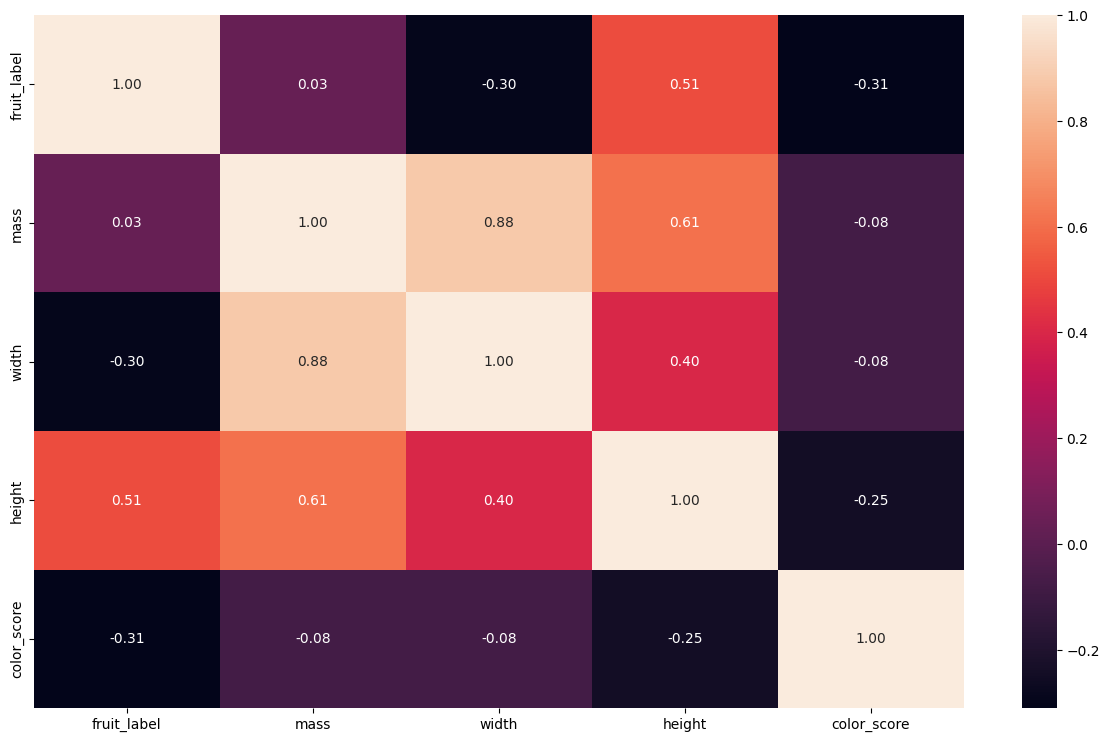

In [9]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [26]:
xArray = data.drop("fruit_label", axis=1)
yArray = data["fruit_label"]

In [27]:
#yArray[yArray==4] = 1
#yArray[yArray==2] = 3
#yArray

In [28]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)


## Линейная регрессия

In [13]:
#Обучение модели
LR = LogisticRegression()
LR.fit(trainX, trainY)

C:\Users\MakVit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#Предсказание целевого признака
predict = LR.predict(testX)
predict

array([4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 2], dtype=int64)

In [15]:
#Вычисление вероятности попадания в той или иной класс
predictpr = LR.predict_proba(testX)
predictpr

array([[2.52088800e-03, 7.80054148e-04, 9.18288411e-03, 9.87516174e-01],
       [5.67228751e-01, 7.03849239e-04, 4.21240443e-01, 1.08269566e-02],
       [3.30182724e-01, 1.96404310e-02, 2.69746310e-01, 3.80430535e-01],
       [6.78428738e-02, 5.92279738e-05, 3.43111384e-01, 5.88986514e-01],
       [3.97083023e-01, 2.28628117e-02, 3.03844438e-01, 2.76209728e-01],
       [4.56105165e-01, 1.30870448e-01, 1.64792237e-01, 2.48232149e-01],
       [4.35649691e-01, 9.07860852e-03, 3.62951378e-01, 1.92320322e-01],
       [6.34378264e-01, 5.61123827e-03, 3.33340226e-01, 2.66702722e-02],
       [6.10159169e-01, 1.46459456e-02, 3.09873981e-01, 6.53209040e-02],
       [9.49560381e-03, 1.10240303e-02, 1.52404144e-02, 9.64239951e-01],
       [1.29940246e-02, 1.43690869e-05, 1.10849799e-01, 8.76141807e-01],
       [1.59025085e-01, 8.21664268e-01, 1.44468408e-02, 4.86380622e-03]])

In [16]:
#Оценка качества модели
balanced_accuracy_score(testY, LR.predict(testX))

0.75

## SVM

In [17]:
#Обучение модели
svm = SVC(kernel='rbf', probability=True)
svm.fit(trainX, trainY) 

SVC(probability=True)

In [18]:
#Предсказание целевого признака
svm.predict_proba(testX)

array([[0.3133434 , 0.09097872, 0.29555555, 0.30012233],
       [0.41716951, 0.00683034, 0.31736985, 0.25863029],
       [0.38498677, 0.03039449, 0.30289527, 0.28172346],
       [0.40603548, 0.00358423, 0.34148035, 0.24889994],
       [0.36730655, 0.0444586 , 0.30105034, 0.28718451],
       [0.36025781, 0.05026865, 0.30043465, 0.28903888],
       [0.40148562, 0.01846131, 0.30580287, 0.27425021],
       [0.4074046 , 0.01453286, 0.30762429, 0.27043825],
       [0.39810761, 0.02089623, 0.30493984, 0.27605631],
       [0.22665255, 0.18699565, 0.26518104, 0.32117076],
       [0.40066882, 0.00343635, 0.34767137, 0.24822346],
       [0.04656305, 0.74222793, 0.08223219, 0.12897683]])

In [19]:
#Оценка качества модели
balanced_accuracy_score(testY, svm.predict(testX))

0.25

In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(trainX, trainY)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = trainX['width'], trainX['height']
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('width')
    ax.set_ylabel('height')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

## Деревья решений

In [21]:
#Обучение модели
DeTree = DecisionTreeClassifier(random_state=1)
DeTree.fit(trainX, trainY)

DecisionTreeClassifier(random_state=1)

In [22]:
#Оценка качества модели
balanced_accuracy_score(testY, DeTree.predict(testX))

1.0

Как показала оценка качества модели, метод дерева решений работает наилучшим образом

In [23]:
#Функция построения графика для вывода признаков, наиболее важных для определения целевого признака
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

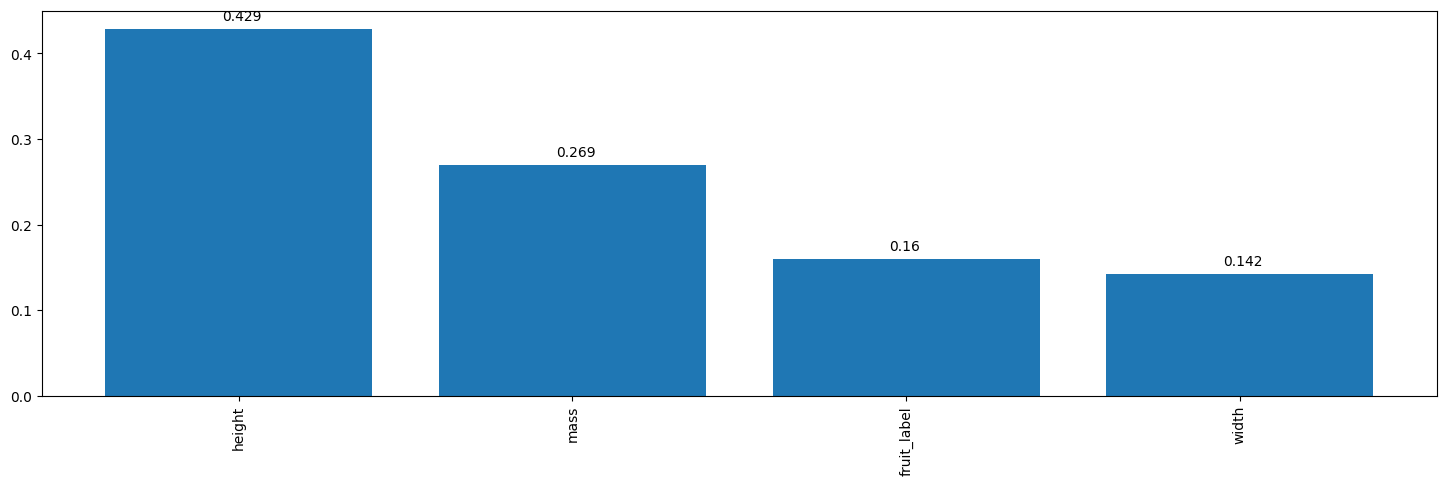

In [24]:
diagram, _ = draw_feature_importances(DeTree, data)

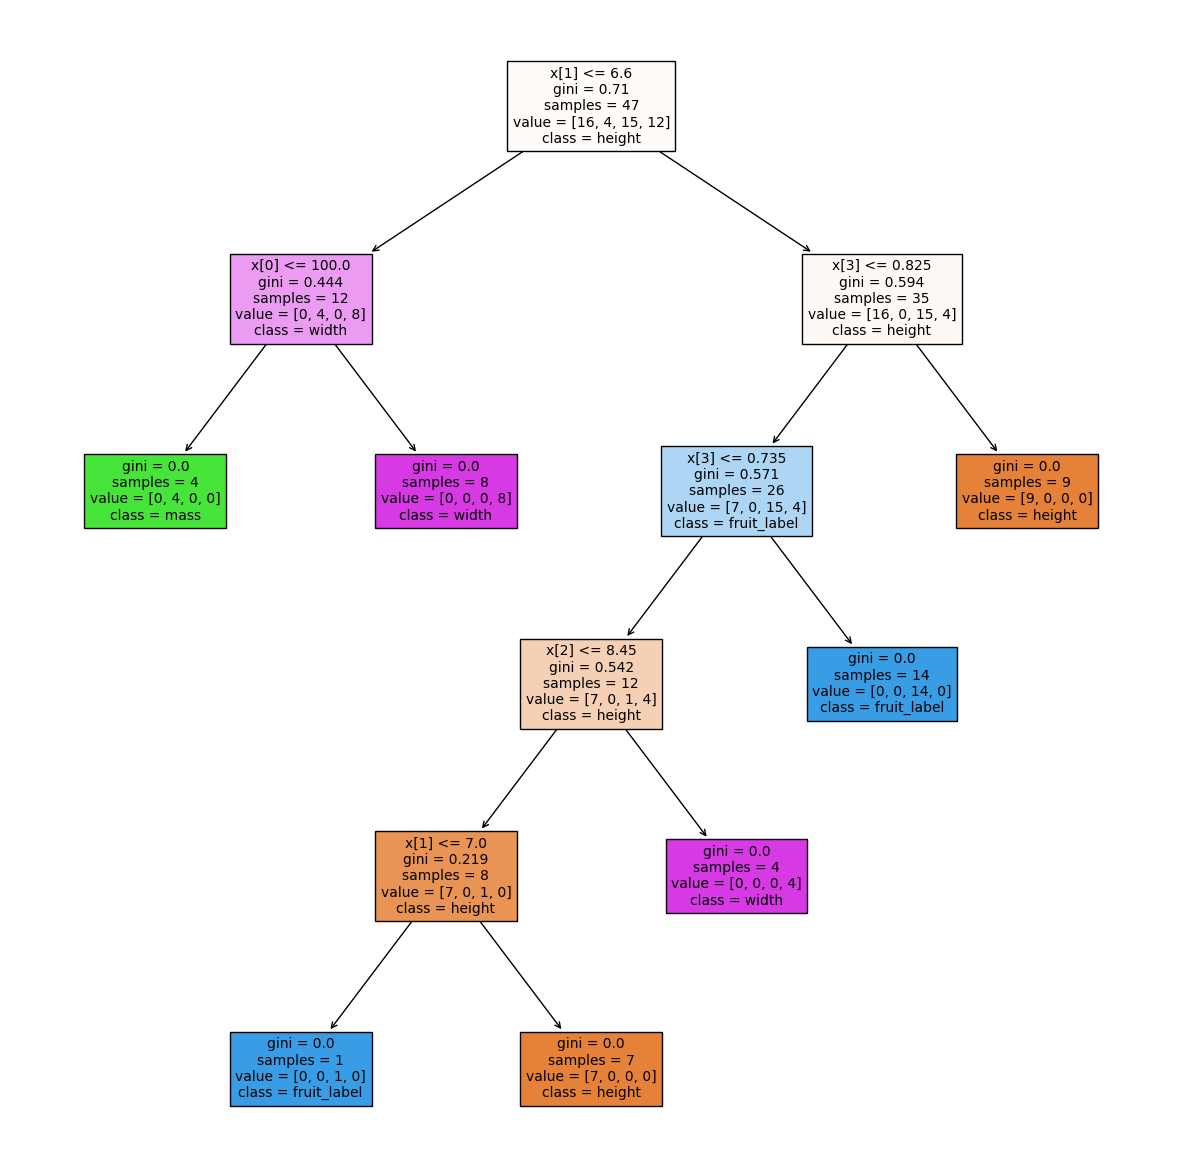

In [25]:
#Визуальное отображение дерева решений
fig, ax = plt.subplots(figsize=(15, 15))
cn=['height', 'mass', 'fruit_label', 'width' ]
tree.plot_tree(DeTree, fontsize=10,class_names=cn, filled=True)
plt.show()